##### importing important libraries

In [2]:
import pandas as pd  #for data analysis
import numpy as np   #for linear algebra
import matplotlib.pyplot as plt   #for visulaization
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [3]:
#importing dataset
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\santhi\\task1-guvi\\assignment10\\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# displaying all the features of the data
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
#Checking the shape of the dataset
data.shape 

(400, 5)

<AxesSubplot:>

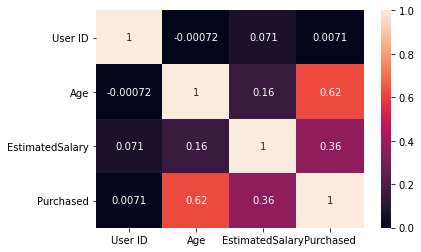

In [6]:
#Correlation between different features of our dataset
sns.heatmap(data.corr(),annot=True)

In [7]:
df1=pd.get_dummies(data=data)

In [8]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


<AxesSubplot:>

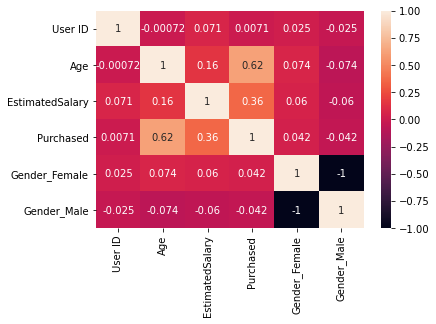

In [9]:
#Correlation between different features of our dataset
sns.heatmap(df1.corr(),annot=True)

In [10]:
#The dependent variable Purchased is very less correlated with User ID so we drop that feature
#We creates dummy variables so we drop one 
df2=df1.drop('User ID',axis=1)
df2=df2.drop('Gender_Male',axis=1)

In [11]:
df2.head()

,Age,EstimatedSalary,Purchased,Gender_Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [12]:
#Separating Depenent and Independent Features
X=df2.iloc[:,[0,1,3]]
Y=df2.iloc[:,2]

In [13]:
X.head()

,Age,EstimatedSalary,Gender_Female
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [14]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [15]:
#Checking the shape of independent and dependent variables
print("Shape of Independent features:",X.shape)
print("Shape of dependent feature:",Y.shape)

Shape of Independent features: (400, 3)
Shape of dependent feature: (400,)


<AxesSubplot:title={'center':'Correlation matrix'}>

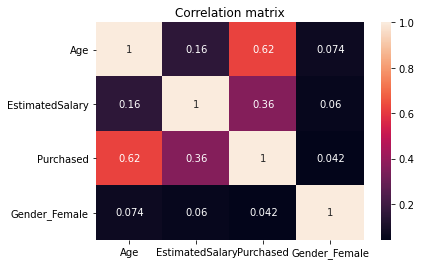

In [16]:
plt.title("Correlation matrix")
sns.heatmap(df2.corr(),annot=True)

# Model Building

In [17]:
#Splitting the Data into training and test dataset
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print("Shape of X_train:",X_train.shape)
print("Shape pf X_test:",X_test.shape)
print("shape of Y_train:",Y_train.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (320, 3)
Shape pf X_test: (80, 3)
shape of Y_train: (320,)
Shape of Y_test: (80,)


# Feature Scaling


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XX_train=sc.fit_transform(X_train)
XX_test=sc.transform(X_test)

# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
model=RandomForestClassifier()

In [23]:

model.fit(XX_train,Y_train.values.ravel())# to train the algorithems

RandomForestClassifier()

In [24]:
predict_output = model.predict(XX_test)# to predict ouput acording to the previeus output(x test)
print(predict_output)

[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0]


In [25]:

from sklearn.metrics import accuracy_score